<a href="https://colab.research.google.com/github/Fredrick-Ofodongoro/CompilerConstructionLabs/blob/main/LabActivity1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CC LAB 1(Definition of terms, Code Snippets) 


# Flex

**Flex**
Is a tool/computer program for generating lexical analyzers.
Flex takes a scanner speicification, and generates it to a NFA to comnine all patterns, which is converted to a DFA, minimizes the automaton as much as possible, and generates C code that will implement it.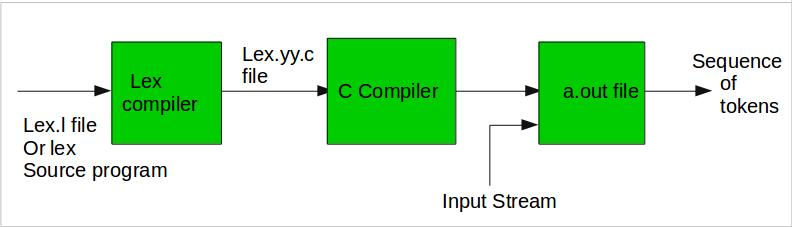
In actual sense flex checks whether and input is correct or not based on the language used. 




In [ ]:
# the code is written in C 
%{
int no_of_lines = 0;
int no_of_chars = 0;
%}
%%
\n      ++no_of_lines;
.       ++no_of_chars;
end     return 0;
%%
int yywrap(){}
int main(int argc, char **argv)
{
  
yylex();
printf("number of lines = %d, number of chars = %d\n",
       no_of_lines, no_of_chars );
  
return 0;
}

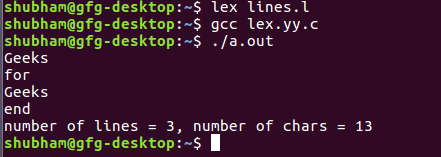

# Bison

Bison is a general-purpose parser generator that converts an annotated context-free grammar into a deterministic LR or generalized LR (GLR) parser employing LALR parser tables. As an experimental feature, Bison can also generate IELR or canonical LR parser tables. Once you are proficient with Bison, you can use it to develop a wide range of language parsers, from those used in simple desk calculators to complex programming languages (Bison - GNU Project - Free Software Foundation, n.d.).

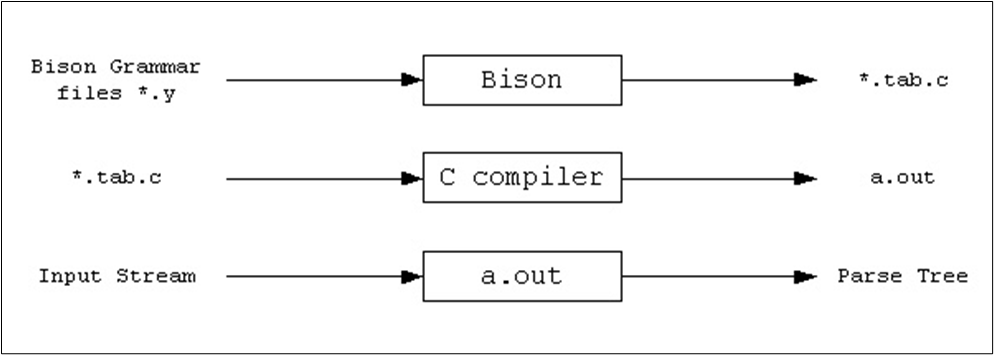

This example shows a simple double-precision Reverse Polish Notation calculator. In the snippet below shows C and Bison declarations for the calculator.

In [ ]:
/* Reverse Polish Notation calculator. */

%{
  #include <stdio.h>
  #include <math.h>
  int yylex (void);
  void yyerror (char const *);
%}

%define api.value.type {double}
%token NUM

%% /* Grammar rules and actions follow. */


Below are the grammar rules for the Reverse Polish Notation Calculator

In [ ]:
input:
  %empty
| input line
;

line:
  '\n'
| exp '\n'      { printf ("%.10g\n", $1); }
;

exp:
  NUM
| exp exp '+'   { $$ = $1 + $2;      }
| exp exp '-'   { $$ = $1 - $2;      }
| exp exp '*'   { $$ = $1 * $2;      }
| exp exp '/'   { $$ = $1 / $2;      }
| exp exp '^'   { $$ = pow ($1, $2); }  /* Exponentiation */
| exp 'n'       { $$ = -$1;          }  /* Unary minus   */
;
%%


#Yacc

YACC is known as yet another compiler compiler. It is used to produce the source code of the syntactic analyzer of the language produced by the LALR(1) grammar. The input of the YACC is the rule of grammar and the output is the C program. 
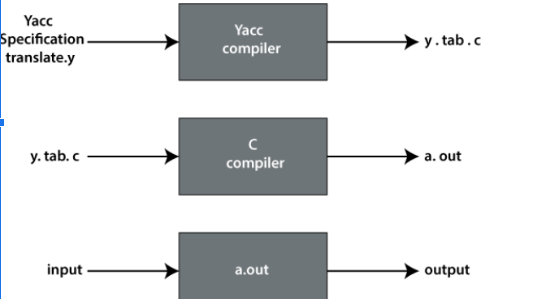


In [ ]:

%{
#include <ctype.h>
#include <stdio.h>
#define YYSTYPE double /* double type for yacc stack */
%}

%%
Lines : Lines S '\n' { printf("OK \n"); }
	| S '\n’
	| error '\n' {yyerror("Error: reenter last line:");
						yyerrok; };
S	 : '(' S ')’
	| '[' S ']’
	| /* empty */ ;
%%

#include "lex.yy.c"

void yyerror(char * s)
/* yacc error handler */
{
fprintf (stderr, "%s\n", s);
}

int main(void)
{
return yyparse();
}


